In [2]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
import operator
from itertools import islice
from tabulate import tabulate
import seaborn as sns
import re

In [3]:
tweets = %cypher match  (n:tweet)<-[r :TWEETS]-(n2:user) where n.lang = 'en' return distinct(n.text)  as text

297166 rows affected.


In [4]:
stop_words_ = set(stopwords.words('english'))  
new_set = set(['000', 'de', 'rt', 'http', 'https', 'amp', '1', '25', 'pm', '2', 'rtudf0a', 'udf0a', 'lifeudc68udfff', 'udfa4udc69udffb', 'udfa8', 'udf08udf37udf3audd16', 'lmaooooooooooooooooooooooooooooooooooooooooooooude02ude02', 'udf31small', 'it’s' ])
stop_words_ = stop_words_.union(new_set)

In [5]:
def getNGram(text, n, stop_words, m):
    punct_signs = list(string.punctuation)
    punct_signs.append('…')
    punct_signs.append('¿')
    for p in punct_signs:
        text = text.replace(p, ' ')
    clean_text = text.lower().split()
    clean_text = [w for w in clean_text if w not in stop_words_]
    total = len(clean_text)
    h_dict = {}   
    ngramas = ngrams(clean_text, n)
    for grams in ngramas:
        words = ' '.join(grams)        
        words = words.strip() 
        if words in h_dict:
            h_dict[words] = h_dict[words] + 1
        else: 
            h_dict[words] = 1 
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    if m >=1:
        results = list(islice(sorted_dict,  m))
        results = [(v[0], v[1], v[1] * 100 / total) for v in results]
        return results
    else:
        return list(islice(sorted_dict, None))
    
def clean_tweets(tweets):
    patternUrl = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    patternUsers =  re.compile('@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    patternTags = re.compile('#(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    allTweets = pd.Series(tweets).str.cat(sep='\n')
    allTweets = patternUrl.sub('', allTweets) #removing urls 
    allTweets = patternUsers.sub('', allTweets) #removing users
    allTweets = patternTags.sub('', allTweets) #removing tags
    return allTweets

In [6]:
allTweets = clean_tweets(tweets.get_dataframe().text)

## Top 30 unigrams in Tweets

In [7]:
final = getNGram(allTweets, 1, stop_words_, 30)
print(tabulate(final, ['Ngram', 'Number', '% of the total (without stopwords)']))

Ngram       Number    % of the total (without stopwords)
--------  --------  ------------------------------------
gun          22046                              0.672519
people       21462                              0.654704
women        20723                              0.63216
school       19781                              0.603424
movement     16798                              0.512427
like         15987                              0.487687
one          13667                              0.416915
get          13322                              0.406391
need         13093                              0.399405
guns         12641                              0.385617
sexual       11427                              0.348583
shooting     11307                              0.344923
time         10853                              0.331073
us           10464                              0.319207
would        10119                              0.308683
children      9383              

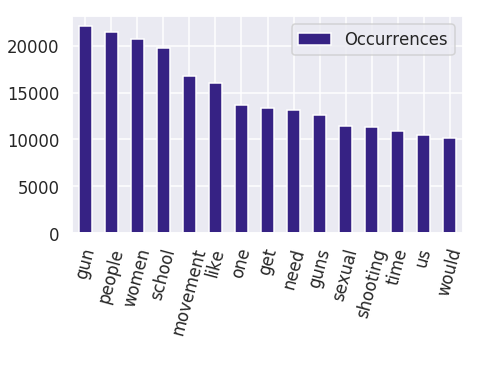

In [8]:
sns.set_context('talk')
sns.set_style('darkgrid')
columns = ['Ngram', 'Occurrences', '% of total']

dfnGrams = pd.DataFrame([x for x in final], columns=columns)

dfnGrams = dfnGrams[['Ngram', 'Occurrences']][:15]
dfnGrams =  dfnGrams.set_index('Ngram')
ax = dfnGrams.plot(kind='bar',  use_index=True, color='#362284', rot=75, figsize=(7, 4))
ax.set_xlabel(" ");
plt.savefig('Popular_unigramsPurple.png', format='png', dpi=600, bbox_inches = 'tight' )
plt.show()

## Top 30 bigrams 

In [9]:
final2 = getNGram(allTweets, 2, stop_words_, 30)
print(tabulate(final2, ['Ngram', 'Number', '% of the total without stopwords']))

Ngram                Number    % of the total without stopwords
-----------------  --------  ----------------------------------
school shooting        5023                           0.153228
gun control            4950                           0.151001
santa fe               4501                           0.137304
high school            4166                           0.127085
sexual harassment      3719                           0.113449
harvey weinstein       3693                           0.112656
thoughts prayers       3529                           0.107653
morgan freeman         3050                           0.093041
school shootings       3003                           0.0916072
gun violence           2708                           0.0826082
sexual assault         2387                           0.072816
fe high                1954                           0.0596072
gun laws               1713                           0.0522555
mass shooting          1700                      

## Top 30 trigramas 

In [10]:
final3 = getNGram(allTweets, 3, stop_words_, 30)
print(tabulate(final3, ['Ngram', 'Number', '% of the total without stopwords']))

Ngram                           Number    % of the total without stopwords
----------------------------  --------  ----------------------------------
fe high school                    1849                           0.0564042
santa fe high                     1847                           0.0563432
another school shooting           1182                           0.0360572
common sense gun                   610                           0.0186082
high school shooting               574                           0.01751
goes church southern               541                           0.0165033
southern baptists face             526                           0.0160458
baptists face reckoning            521                           0.0158932
face reckoning treatment           521                           0.0158932
church southern baptists           514                           0.0156797
reckoning treatment women          511                           0.0155882
limited edition get        

## Top 40 Hashtags

In [11]:
%cypher match (n:hashtag)-[r]-() return n.hashtag as Hashtag, count(r) as degree order by degree desc limit 40

40 rows affected.


Hashtag,degree
metoo,245944
guncontrol,74867
guncontrolnow,64838
blacklivesmatter,17833
climatechange,14646
timesup,10886
santafehighschool,10351
santafe,10013
nra,8450
fbr,6952
